In [46]:
import numpy as np
from array import array
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score


In [76]:
numOfEpochs = 100
batch = 25

Epoch 1/100
4/4 [==============================] - 1s 7ms/step - loss: 2.3451 - accuracy: 0.1200
Epoch 2/100
4/4 [==============================] - 0s 8ms/step - loss: 1.7499 - accuracy: 0.6200
Epoch 3/100
4/4 [==============================] - 0s 7ms/step - loss: 1.3501 - accuracy: 0.7700
Epoch 4/100
4/4 [==============================] - 0s 8ms/step - loss: 1.0220 - accuracy: 0.8900
Epoch 5/100
4/4 [==============================] - 0s 10ms/step - loss: 0.7560 - accuracy: 0.9300
Epoch 6/100
4/4 [==============================] - 0s 8ms/step - loss: 0.5678 - accuracy: 0.9500
Epoch 7/100
4/4 [==============================] - 0s 7ms/step - loss: 0.4293 - accuracy: 0.9800
Epoch 8/100
4/4 [==============================] - 0s 8ms/step - loss: 0.3265 - accuracy: 0.9900
Epoch 9/100
4/4 [==============================] - 0s 10ms/step - loss: 0.2488 - accuracy: 0.9900
Epoch 10/100
4/4 [==============================] - 0s 8ms/step - loss: 0.1958 - accuracy: 0.9900
Epoch 11/100
4/4 [=========

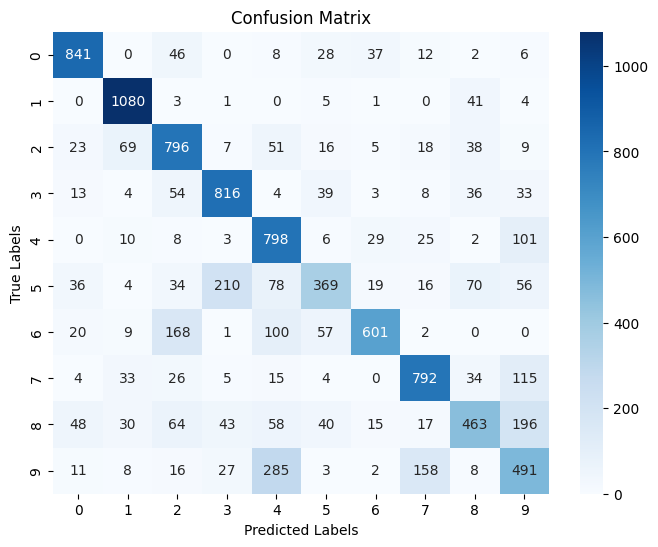

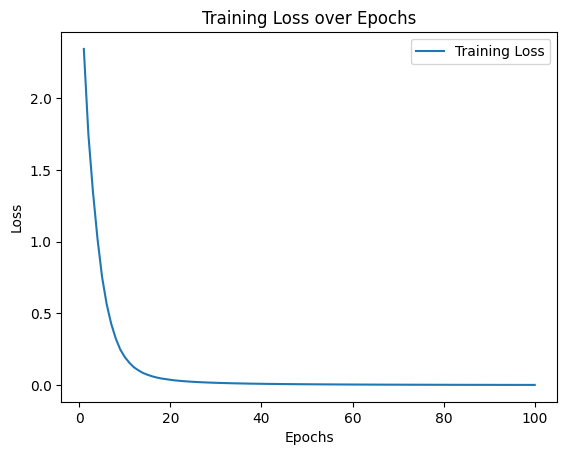

In [69]:

# Load MNIST dataset
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Select 10,000 samples for training (10 labeled samples from each class)
# Reshape and normalize data
train_images = train_images.reshape(-1, 784).astype('float32') / 255.0
test_images = test_images.reshape(-1, 784).astype('float32') / 255.0

# Select 10,000 samples for training (1000 examples from each class)
labeled_indices = []
unlabeled_indices = []
for i in range(10):
    indices = np.where(train_labels == i)[0]
    labeled_indices.extend(indices[:10])  # Select 10 labeled indices for each digit
    unlabeled_indices.extend(indices[10:1000])  # Select 1000 unlabeled indices for each digit

labeled_indices = np.array(labeled_indices)
labeled_images = train_images[labeled_indices]
labeled_labels = train_labels[labeled_indices]

unlabeled_indices = np.array(unlabeled_indices)
unlabeled_images = train_images[unlabeled_indices]

# Create a 2-layer neural network for MNIST
model = models.Sequential([
    layers.Dense(200, activation='relu', input_shape=(784,)),
    layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the baseline model using only labeled data
Baseline = model.fit(labeled_images, labeled_labels, epochs=numOfEpochs, batch_size=batch, verbose=1)

# Evaluate the baseline model on the test set
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Baseline Model Test Accuracy: {test_acc}")
print(unlabeled_images.shape)

unlabeled_prediction = model.predict(unlabeled_images)
unlabeled_prediction_indices = np.argmax(unlabeled_prediction, axis=1)

# Predict labels for the test set
predictions = model.predict(test_images)
predicted_labels = np.argmax(predictions, axis=1)

# Create confusion matrix
conf_matrix = confusion_matrix(test_labels, predicted_labels)

accuracy = accuracy_score(test_labels, predicted_labels)

# Calculate Precision
precision = precision_score(test_labels, predicted_labels, average='weighted')  # 'weighted' for multiclass

# Calculate Recall
recall = recall_score(test_labels, predicted_labels, average='weighted')  # 'weighted' for multiclass

# Calculate F1 Score
f1 = f1_score(test_labels, predicted_labels, average='weighted')  # 'weighted' for multiclass

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()
# Extract training loss from history object
training_loss = Baseline.history['loss']

# Plotting training loss
plt.plot(range(1, len(training_loss) + 1), training_loss, label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss over Epochs')
plt.legend()
plt.show()


Epoch 1/100
400/400 [==============================] - 3s 5ms/step - loss: 0.4561 - accuracy: 0.8622
Epoch 2/100
400/400 [==============================] - 1s 4ms/step - loss: 0.1937 - accuracy: 0.9343
Epoch 3/100
400/400 [==============================] - 2s 5ms/step - loss: 0.1469 - accuracy: 0.9486
Epoch 4/100
400/400 [==============================] - 2s 5ms/step - loss: 0.1138 - accuracy: 0.9646
Epoch 5/100
400/400 [==============================] - 2s 5ms/step - loss: 0.1044 - accuracy: 0.9670
Epoch 6/100
400/400 [==============================] - 2s 5ms/step - loss: 0.0797 - accuracy: 0.9747
Epoch 7/100
400/400 [==============================] - 2s 5ms/step - loss: 0.0675 - accuracy: 0.9794
Epoch 8/100
400/400 [==============================] - 2s 4ms/step - loss: 0.0738 - accuracy: 0.9757
Epoch 9/100
400/400 [==============================] - 2s 4ms/step - loss: 0.0571 - accuracy: 0.9834
Epoch 10/100
400/400 [==============================] - 2s 4ms/step - loss: 0.0439 - accura

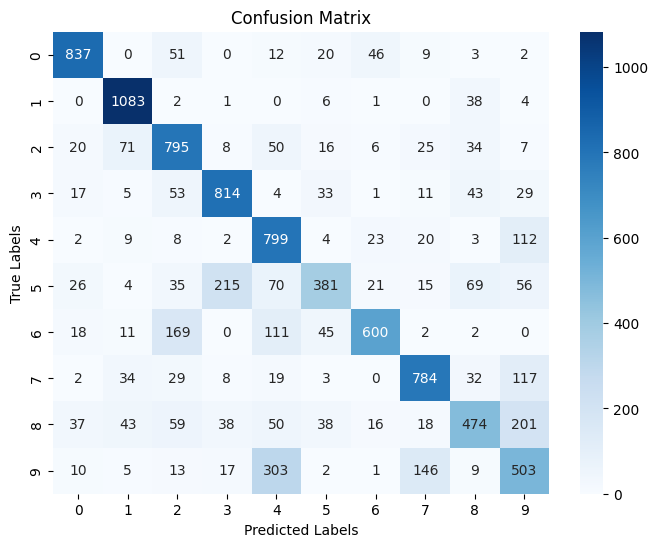

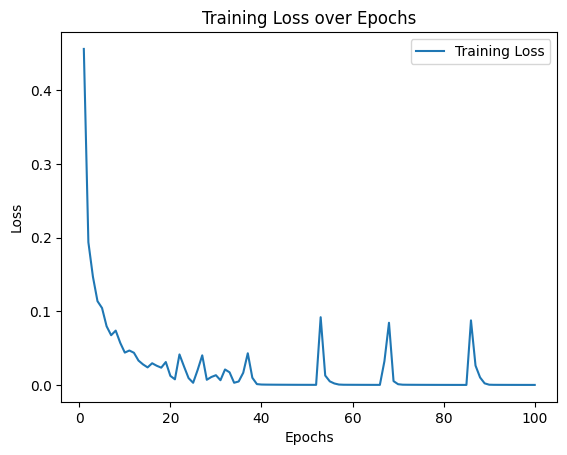

In [70]:

# Define a custom loss funcion for entropy minimization
def entropy_minimization_loss(y_true,y_pred):
    # Calculate the entropy of the predicted probabilities
    entropy = -tf.reduce_sum(y_pred * tf.math.log(y_pred + 1e-8), axis=-1)

    # Weighted sum of the original loss and entropy loss
    return tf.keras.losses.sparse_categorical_crossentropy(y_true, y_pred) + lambda_value * entropy
    
# Create a new model for Entropy Minimization
model_entropy_minimization = models.Sequential([
    layers.Dense(200, activation='relu', input_shape=(784,)),
    layers.Dense(10, activation='softmax')
])

# Compile the model with the custom loss function
model_entropy_minimization.compile(optimizer='adam', loss=entropy_minimization_loss, metrics=['accuracy'])

# Combine labeled and unlabeled data
x_combined = np.concatenate([labeled_images, unlabeled_images], axis=0)
y_combined_labeled = labeled_labels
y_combined_unlabeled = unlabeled_prediction_indices  # Assign dummy labels for unlabeled data
#y_combined_unlabeled =  np.array(len(unlabeled_images))  # Assign dummy labels for unlabeled data


# Concatenate labeled and unlabeled labels
y_combined = np.concatenate([y_combined_labeled, y_combined_unlabeled], axis=0)

# Shuffle the combined data
combined_data = list(zip(x_combined, y_combined))
np.random.shuffle(combined_data)
x_combined, y_combined = zip(*combined_data)

x_combined = np.array(x_combined)
y_combined = np.array(y_combined)

lambda_value = 0.1

# Train the model with entropy minimization
EntropyMinimization = model_entropy_minimization.fit(x_combined, y_combined, epochs=numOfEpochs, batch_size=batch, verbose=1)

# Evaluate the model on the test set
test_loss_entropy, test_acc_entropy = model_entropy_minimization.evaluate(test_images, test_labels)
print(f"Entropy Minimization Model Test Accuracy: {test_acc_entropy}")

#Extract training loss and testing loss from history
train_loss_entropy = EntropyMinimization.history['loss']
test_loss_entropy, _ = model_entropy_minimization.evaluate(test_images, test_labels, verbose=0)

# Predict labels for the test set
predictions = model_entropy_minimization.predict(test_images)
predicted_labels = np.argmax(predictions, axis=1)

# Create confusion matrix
conf_matrix = confusion_matrix(test_labels, predicted_labels)

accuracy = accuracy_score(test_labels, predicted_labels)

# Calculate Precision
precision = precision_score(test_labels, predicted_labels, average='weighted')  # 'weighted' for multiclass

# Calculate Recall
recall = recall_score(test_labels, predicted_labels, average='weighted')  # 'weighted' for multiclass

# Calculate F1 Score
f1 = f1_score(test_labels, predicted_labels, average='weighted')  # 'weighted' for multiclass

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Extract training loss from history object
training_loss = EntropyMinimization.history['loss']

# Plotting training loss
plt.plot(range(1, len(training_loss) + 1), training_loss, label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss over Epochs')
plt.legend()
plt.show()


Epoch 1/10
4/4 [==============================] - 1s 6ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 2/10
4/4 [==============================] - 0s 9ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 3/10
4/4 [==============================] - 0s 8ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 4/10
4/4 [==============================] - 0s 7ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 5/10
4/4 [==============================] - 0s 7ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 6/10
4/4 [==============================] - 0s 7ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 7/10
4/4 [==============================] - 0s 7ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 8/10
4/4 [==============================] - 0s 7ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 9/10
4/4 [==============================] - 0s 7ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 10/10
310/310 [==============================] - 1s 3ms/step
Epoch 1/100
250/250 [============

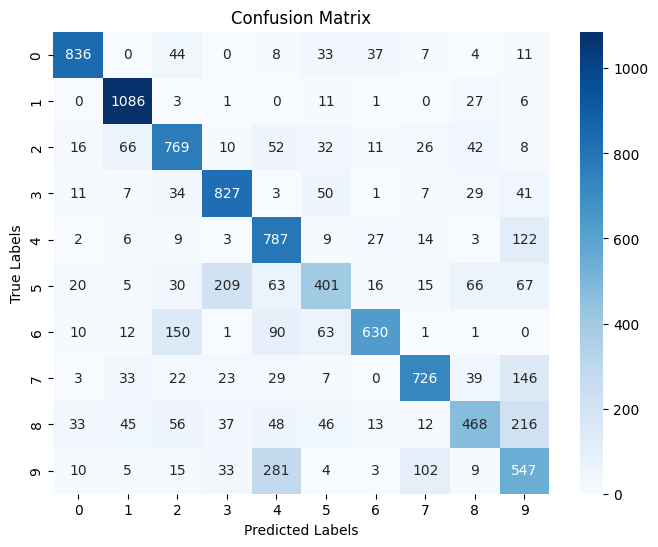

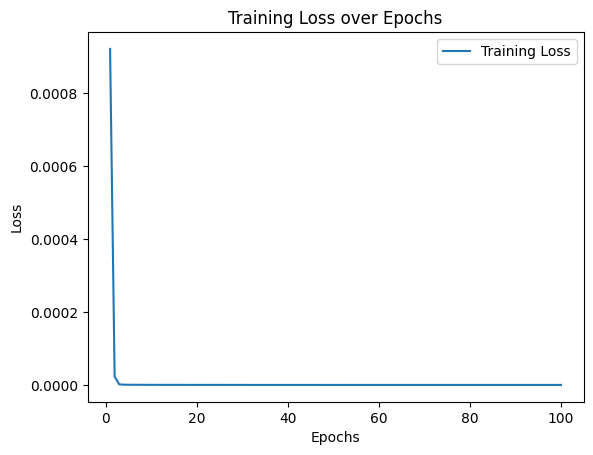

In [77]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model using labeled data
model.fit(labeled_images, labeled_labels, epochs=10, batch_size=32, verbose=1)

# Pseudo labeling for unlabeled data
pseudo_labels = model.predict(unlabeled_images)
pseudo_labels = np.argmax(pseudo_labels, axis=1)

# Combine labeled and pseudo-labeled data
x_combined = np.concatenate([labeled_images, unlabeled_images], axis=0)
y_combined = np.concatenate([labeled_labels, pseudo_labels], axis=0)

# Shuffle the combined data
combined_data = list(zip(x_combined, y_combined))
np.random.shuffle(combined_data)
x_combined, y_combined = zip(*combined_data)
x_combined = np.array(x_combined)
y_combined = np.array(y_combined)

# Train the model with combined labeled and pseudo-labeled data
PseudoLabel = model.fit(x_combined, y_combined, epochs=numOfEpochs, batch_size=batch, verbose=1)

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Model Test Accuracy: {test_acc}")

# Predict labels for the test set
predictions = model.predict(test_images)
predicted_labels = np.argmax(predictions, axis=1)

# Create and plot confusion matrix
conf_matrix = confusion_matrix(test_labels, predicted_labels)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

accuracy = accuracy_score(test_labels, predicted_labels)

# Calculate Precision
precision = precision_score(test_labels, predicted_labels, average='weighted')  # 'weighted' for multiclass

# Calculate Recall
recall = recall_score(test_labels, predicted_labels, average='weighted')  # 'weighted' for multiclass

# Calculate F1 Score
f1 = f1_score(test_labels, predicted_labels, average='weighted')  # 'weighted' for multiclass

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

# Extract training loss from history object
training_loss = PseudoLabel.history['loss']

# Plotting training loss
plt.plot(range(1, len(training_loss) + 1), training_loss, label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss over Epochs')
plt.legend()
plt.show()

Epoch 1/10
4/4 [==============================] - 1s 11ms/step - loss: 0.2587 - accuracy: 0.9800
Epoch 2/10
4/4 [==============================] - 0s 9ms/step - loss: 0.1824 - accuracy: 0.9900
Epoch 3/10
4/4 [==============================] - 0s 9ms/step - loss: 0.1314 - accuracy: 1.0000
Epoch 4/10
4/4 [==============================] - 0s 11ms/step - loss: 0.0964 - accuracy: 1.0000
Epoch 5/10
4/4 [==============================] - 0s 12ms/step - loss: 0.0706 - accuracy: 1.0000
Epoch 6/10
4/4 [==============================] - 0s 10ms/step - loss: 0.0536 - accuracy: 1.0000
Epoch 7/10
4/4 [==============================] - 0s 8ms/step - loss: 0.0433 - accuracy: 1.0000
Epoch 8/10
4/4 [==============================] - 0s 12ms/step - loss: 0.0347 - accuracy: 1.0000
Epoch 9/10
4/4 [==============================] - 0s 7ms/step - loss: 0.0301 - accuracy: 1.0000
Epoch 10/10
310/310 [==============================] - 2s 5ms/step
Epoch 1/10
313/313 [==============================] - 3s 8ms/ste

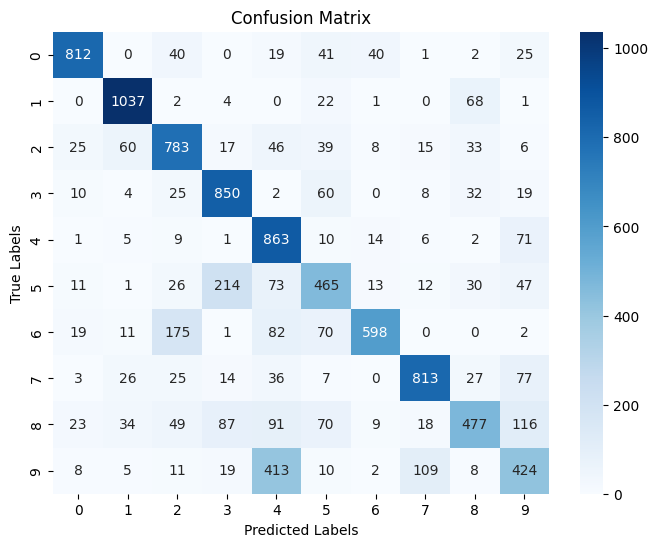

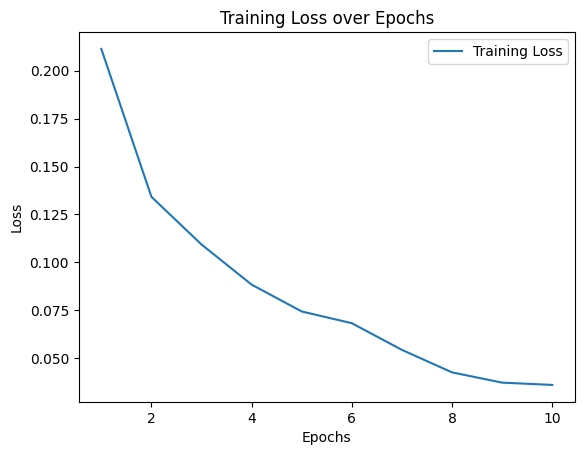

In [35]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model using labeled data
model.fit(labeled_images, labeled_labels, epochs=10, batch_size=32, verbose=1)

# Pseudo labeling for unlabeled data
my_pseudo_labels = model.predict(unlabeled_images)
my_pseudo_labels = np.argmax(pseudo_labels, axis=1)

# Combine labeled and pseudo-labeled data
x_combined = np.concatenate([labeled_images, unlabeled_images], axis=0)
y_combined = np.concatenate([labeled_labels, pseudo_labels], axis=0)

# Shuffle the combined data
combined_data = list(zip(x_combined, y_combined))
np.random.shuffle(combined_data)
x_combined, y_combined = zip(*combined_data)
x_combined = np.array(x_combined)
y_combined = np.array(y_combined)

# Train the model with combined labeled and pseudo-labeled data
MyPseudoLabel = model.fit(x_combined, y_combined, epochs=numOfEpochs, batch_size=32, verbose=1)

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Model Test Accuracy: {test_acc}")

# Predict labels for the test set
predictions = model.predict(test_images)
predicted_labels = np.argmax(predictions, axis=1)

# Create and plot confusion matrix
conf_matrix = confusion_matrix(test_labels, predicted_labels)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

accuracy = accuracy_score(test_labels, predicted_labels)

# Calculate Precision
precision = precision_score(test_labels, predicted_labels, average='weighted')  # 'weighted' for multiclass

# Calculate Recall
recall = recall_score(test_labels, predicted_labels, average='weighted')  # 'weighted' for multiclass

# Calculate F1 Score
f1 = f1_score(test_labels, predicted_labels, average='weighted')  # 'weighted' for multiclass

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

training_loss = MyPseudoLabel.history['loss']

# Plotting training loss
plt.plot(range(1, len(training_loss) + 1), training_loss, label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss over Epochs')
plt.legend()
plt.show()


Test set: Average loss: 0.0182, Accuracy: 65.44%


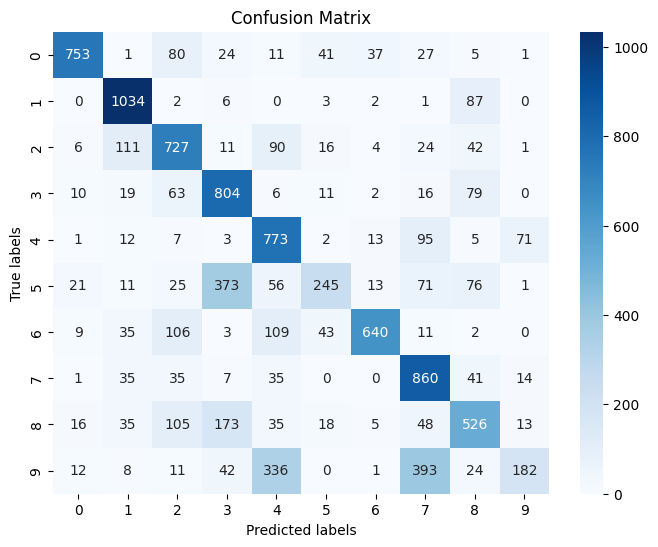

In [78]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import numpy as np

# Set random seed for reproducibility
torch.manual_seed(42)

# Define the neural network architecture
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(784, 200),
            nn.ReLU(),
            nn.Linear(200, 10)
        )

    def forward(self, x):
        return self.model(x)

# VAT loss function
def virtual_adversarial_loss(model, x, logit):
    d = torch.randn_like(x, requires_grad=True)
    for _ in range(1):  # Small number of iterations for perturbation
        d = 0.1 * (d / torch.norm(d, dim=1, keepdim=True)).requires_grad_()
        logit_p = model(x + d)
        adv_distance = torch.nn.functional.kl_div(logit_p.log_softmax(dim=1), logit.softmax(dim=1), reduction='batchmean')
        gradients = torch.autograd.grad(adv_distance, [d])[0]  # Compute gradients
        d = d + 0.1 * (gradients / torch.norm(gradients, dim=1, keepdim=True))  # Update perturbation

    logit_q = model(x + d)
    lds = torch.nn.functional.kl_div(logit_q.log_softmax(dim=1), logit.softmax(dim=1), reduction='batchmean')
    return lds


# Function to train the model
def train_model(model, train_loader_labeled, train_loader_unlabeled, criterion, optimizer, num_epochs=10):
    model.train()
    for epoch in range(num_epochs):
        for (labeled_data, labels), (unlabeled_data, _) in zip(train_loader_labeled, train_loader_unlabeled):
            labeled_data = labeled_data.view(-1, 784)
            unlabeled_data = unlabeled_data.view(-1, 784)

            optimizer.zero_grad()

            # Forward pass for labeled data
            labeled_outputs = model(labeled_data)
            loss_supervised = criterion(labeled_outputs, labels)

            # Forward pass for unlabeled data with VAT
            unlabeled_outputs = model(unlabeled_data)
            loss_unlabeled = virtual_adversarial_loss(model, unlabeled_data, unlabeled_outputs)

            total_loss = loss_supervised + loss_unlabeled
            total_loss.backward()
            optimizer.step()

# Function to evaluate the model
def evaluate_model(model, test_loader, criterion):
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            data = data.view(-1, 784)
            output = model(data)
            test_loss += criterion(output, target).item()
            pred = output.argmax(dim=1, keepdim=True)
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(test_loader.dataset)
    accuracy = 100. * correct / len(test_loader.dataset)
    print(f'Test set: Average loss: {test_loss:.4f}, Accuracy: {accuracy:.2f}%')

# Load MNIST dataset
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
train_dataset = datasets.MNIST(root='./data', train=True, transform=transform, download=True)
test_dataset = datasets.MNIST(root='./data', train=False, transform=transform, download=True)

# Create labeled and unlabeled data loaders
labeled_indices = np.concatenate([np.where(train_dataset.targets == i)[0][:10] for i in range(10)])
unlabeled_indices = np.setdiff1d(np.arange(len(train_dataset)), labeled_indices)

train_loader_labeled = DataLoader(train_dataset, batch_size=64, sampler=torch.utils.data.SubsetRandomSampler(labeled_indices))
train_loader_unlabeled = DataLoader(train_dataset, batch_size=64, sampler=torch.utils.data.SubsetRandomSampler(unlabeled_indices))
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

# Initialize the neural network model, criterion, and optimizer
model = NeuralNetwork()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Train the model
train_model(model, train_loader_labeled, train_loader_unlabeled, criterion, optimizer, num_epochs=10)

# Evaluate the model
evaluate_model(model, test_loader, criterion)

#import matplotlib.pyplot as plt
#from sklearn.metrics import confusion_matrix
#import seaborn as sns

# Function to get predictions on the test set
def get_predictions(model, test_loader):
    model.eval()
    predictions = []
    ground_truth = []
    with torch.no_grad():
        for data, target in test_loader:
            data = data.view(-1, 784)
            output = model(data)
            pred = output.argmax(dim=1, keepdim=True)
            predictions.extend(pred.cpu().numpy())
            ground_truth.extend(target.cpu().numpy())
    return np.array(predictions).flatten(), np.array(ground_truth)

# Get predictions and ground truth labels
predicted_labels, true_labels = get_predictions(model, test_loader)

# Generate confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.arange(10), yticklabels=np.arange(10))
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
import numpy as np

import matplotlib.pyplot as plt

from sklearn.datasets import make_moons

from sklearn.neural_network import MLPClassifier

from scipy.stats import entropy

 

# Create a Two-Moon dataset

np.random.seed(0)

X, y = make_moons(n_samples=300, noise=0.1)

X_labeled = X[:6]  # 3 labeled examples per class

y_labeled = y[:6]

X_unlabeled = X[6:]  # Rest of the data as unlabeled

 

# Baseline - Supervised Learning

baseline_model = MLPClassifier(hidden_layer_sizes=(10,), activation='logistic', max_iter=10000)

baseline_model.fit(X_labeled, y_labeled)

baseline_accuracy = baseline_model.score(X_unlabeled, y[6:])

 

# Entropy-based Semi-Supervised Learning (Entropy Minimization)

model = MLPClassifier(hidden_layer_sizes=(10,), activation='logistic', max_iter=10000)

model.fit(X_labeled, y_labeled)

y_unlabeled_proba = model.predict_proba(X_unlabeled)

entropy_values = entropy(y_unlabeled_proba.T)

threshold = np.percentile(entropy_values, 70)  # Adjust the threshold

pseudo_labels = np.argmax(y_unlabeled_proba, axis=1) if threshold > 0 else -1

pseudo_labeled_indices = np.where(entropy_values < threshold)[0]

X_combined = np.vstack((X_labeled, X_unlabeled[pseudo_labeled_indices]))

y_combined = np.hstack((y_labeled, pseudo_labels[pseudo_labeled_indices]))

 

semi_supervised_model_entropy = MLPClassifier(hidden_layer_sizes=(10,), activation='logistic', max_iter=10000)

semi_supervised_model_entropy.fit(X_combined, y_combined)

semi_supervised_accuracy_entropy = semi_supervised_model_entropy.score(X_unlabeled, y[6:])

 

# Pseudo Labeling - Original Semi-Supervised Learning Technique

pseudo_model_original = MLPClassifier(hidden_layer_sizes=(10,), activation='logistic', max_iter=10000)

pseudo_model_original.fit(np.vstack((X_labeled, X_unlabeled)), np.hstack((y_labeled, [-1] * len(X_unlabeled))))

pseudo_labels_original = pseudo_model_original.predict(X_unlabeled)

pseudo_labeled_indices_original = np.where(pseudo_labels_original != -1)[0]

X_combined_pseudo_original = np.vstack((X_labeled, X_unlabeled[pseudo_labeled_indices_original]))

y_combined_pseudo_original = np.hstack((y_labeled, pseudo_labels_original[pseudo_labeled_indices_original]))

 

semi_supervised_model_pseudo_original = MLPClassifier(hidden_layer_sizes=(10,), activation='logistic', max_iter=10000)

semi_supervised_model_pseudo_original.fit(X_combined_pseudo_original, y_combined_pseudo_original)

semi_supervised_accuracy_pseudo_original = semi_supervised_model_pseudo_original.score(X_unlabeled, y[6:])

 

# Pseudo Labeling - Custom Technique

pseudo_model_custom = MLPClassifier(hidden_layer_sizes=(10,), activation='logistic', max_iter=10000)

pseudo_model_custom.fit(X_labeled, y_labeled)

 

# Generate pseudo-labels for unlabeled data

pseudo_labels_custom = pseudo_model_custom.predict(X_unlabeled)

 

# Get confidence scores for pseudo-labeled data

pseudo_confidence_scores = np.max(pseudo_model_custom.predict_proba(X_unlabeled), axis=1)

 

# Filter pseudo-labeled data based on confidence threshold

confidence_threshold = 0.8  # Adjust the threshold as needed

filtered_indices = np.where(pseudo_confidence_scores >= confidence_threshold)[0]

 

# Use only highly confident pseudo-labeled data for training

X_combined_pseudo_custom = np.vstack((X_labeled, X_unlabeled[filtered_indices]))

y_combined_pseudo_custom = np.hstack((y_labeled, pseudo_labels_custom[filtered_indices]))

 

semi_supervised_model_custom = MLPClassifier(hidden_layer_sizes=(10,), activation='logistic', max_iter=10000)

semi_supervised_model_custom.fit(X_combined_pseudo_custom, y_combined_pseudo_custom)

semi_supervised_accuracy_custom = semi_supervised_model_custom.score(X_unlabeled, y[6:])

 

# Plot all decision boundaries for the models

def plot_all_decision_boundaries(models, titles):

    plt.figure(figsize=(10, 8))

 

    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1

    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1

    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

 

    for idx, model in enumerate(models):

        plt.subplot(2, 2, idx + 1)

        Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

        Z = Z.reshape(xx.shape)

        plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu, alpha=0.8)

        plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu, edgecolors='k')

        plt.title(titles[idx])

 

    plt.tight_layout()

    plt.show()

 

# Create models for each approach

models = [

    baseline_model,

    semi_supervised_model_entropy,

    semi_supervised_model_pseudo_original,

    semi_supervised_model_custom

]

titles = [

    'Supervised Learning (Baseline)',

    'Entropy Minimization',

    'Original Pseudo Labeling',

    'Custom Pseudo Labeling'

]

 

# Plot all decision boundaries

plot_all_decision_boundaries(models, titles)

 

# Print accuracies

print("Baseline (Supervised Learning) Accuracy:", baseline_accuracy)

print("Entropy Minimization (Semi-Supervised) Accuracy:", semi_supervised_accuracy_entropy)

print("Original Pseudo Labeling (Semi-Supervised) Accuracy:", semi_supervised_accuracy_pseudo_original)

print("Custom Pseudo Labeling (Semi-Supervised) Accuracy:", semi_supervised_accuracy_custom)

 

 